# Chapter 02

In [1]:
import pint
ureg = pint.UnitRegistry()

import numpy as np

from sympy import *
init_printing()

# force plots to display in notebook, not new window
%matplotlib inline

## Problem 02.40



A solution containing hazardous waste is charged into a storage tank and subjected to a chemical treatment that decomposes the waste to harmless products. The concentration of the decomposing waste, C, has been reported to vary with time according to the formula

$$ C = 1 / (a + b t) $$

When sufficient time has elapsed for the concentration to drop to 0.01 g/L, the contents of the tank are discharged into a river that passes by the plant. The following data are taken for C and t:

In [2]:
# t is in hours
tdata = [1.0, 2.0, 3.0, 4.0, 5.0]
# C is in g/L
Cdata = [1.43, 1.02, 0.73, 0.53, 0.38]

(a) If the given formula is correct, what plot would yield a straight line that would enable you to determine the parameters $a$ and $b$?

$$ C = 1 / (a + b t) $$ ->
$$ 1/C = a + b t $$

Plot $1/C$ vs $t$ where the slope is $b$ and the intercept is $a$

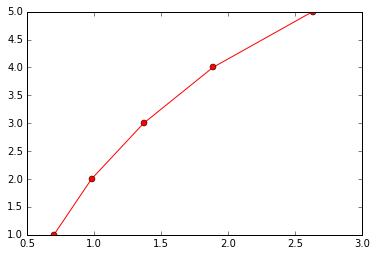

In [7]:
t = symbols('t')
Cinv = [1/Cdata[0], 1/Cdata[1], 1/Cdata[2], 1/Cdata[3], 1/Cdata[4]]

import matplotlib.pyplot as plt
plt.plot(Cinv, tdata,'ro-')

(b) Estimate a and b using the method of least squares (Appendix A.1). Check the goodness of fit by generating a plot of C vs t that shows both the measured and predicted values of C.

In [56]:
# sx = sum(ti) / number of data points
sx = sum(tdata)/len(tdata)

# sxx = sum(ti**2) / number of points
sxx = (tdata[0]**2 + tdata[1]**2 + tdata[2]**2 + 
       tdata[3]**2 + tdata[4]**2)/len(tdata)

# sy = sum(Ci) / number of points
sy = (sum(Cinv))/len(Cinv)

# sxy = sum(ti*Ci) / number of poitns
sxy = ((Cinv[0]*tdata[0]) + (Cinv[1]*tdata[1]) + 
       (Cinv[2]*tdata[2]) + (Cinv[3]*tdata[3]) + 
       (Cinv[4]*tdata[4]))/len(tdata)

In [57]:
b = (sxy - sx*sy)/(sxx-(sx)**2)
a = (sxx*sy - sxy*sx)/(sxx-(sx)**2)

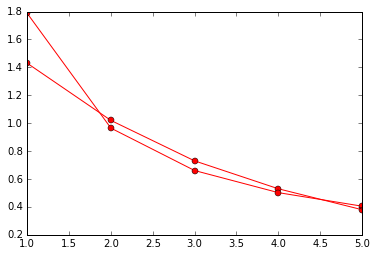

In [58]:
# C = 1/(a + b t )
# plug in calculated a and b to get predicted points
Cpredicted = [1/(b*tdata[0]+a), 
              1/(b*tdata[1]+a),
              1/(b*tdata[2]+a),
              1/(b*tdata[3]+a),
              1/(b*tdata[4]+a)]

# plot both given data and predicted C
import matplotlib.pyplot as plt
plt.plot(tdata, Cdata,'ro-', tdata, Cpredicted, 'ro-')

(c) Using the results of part (b), estimate the initial concentration of the waste in the tank and the time required for C to reach its discharge level

In [61]:
C = Function('C')
t = symbols('t')
C = 1/(a + b*t)

In [64]:
# plug in t=0 for inital concentration
C.subs(t, 0)

In [66]:
# C =0.01 g/L, solve for t (hours)
solve(Eq(C, 0.01)) * ureg.hour

<Quantity([209.429064100952], 'hour')>

(d) You should have very little confidence in the time estimated in part (c). Explain why.

The line of least squares was not very accurate and is appears to be quite different than the data at t=1 so t=0, which is not seen in the data, is likely quite different.

t=209 is very far out of the data given and is likely wildly different.

(e) There are other potential problems with the whole waste disposal procedure. Suggest several of them.

- The treatment appears to require a very long time (t=209 is estimated)
- The substance could still be harmful to aquatic life at 0.01 g/L